In [12]:
import scipy.stats as stats
import scipy
import numpy as np

Первое задание
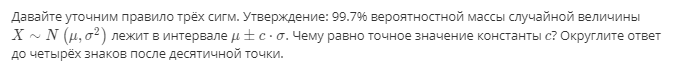

In [13]:
stats.norm.ppf(0.9985)

2.9677379253417944

Второе задание
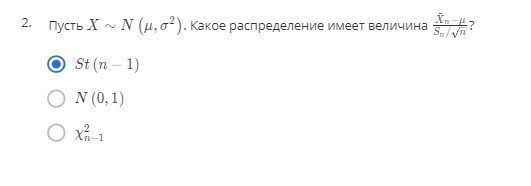

Третье задание
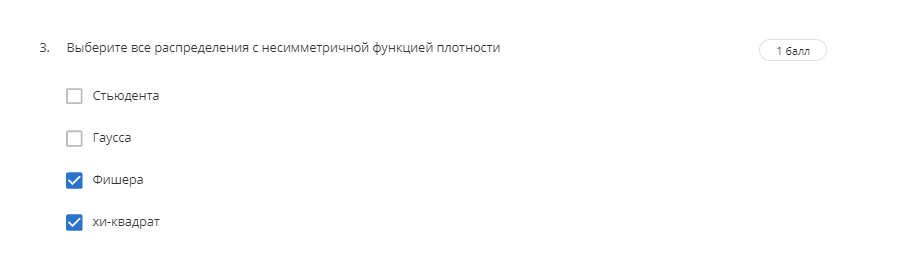

Четвертое задание
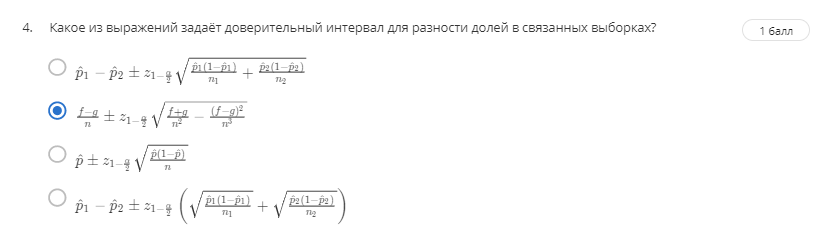

Пятое задание

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.



In [14]:
np.random.seed(1)
asp = np.random.randint(1, size = 11037)
for i in range(0, 104):
    asp[i] = 1
placebo = np.random.randint(1, size = 11034)
for i in range(0, 189):
    placebo[i] = 1                           

In [15]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [16]:
proportions_confint_diff_rel(placebo, asp)


(0.006072118919127238, 0.009334805133800077)

In [17]:
- sum(asp)/len(asp) + sum(placebo)/len(placebo)

0.0077060239760047815

Шестое задание

Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.



In [18]:
from statsmodels.stats.proportion import proportion_confint

In [19]:
print( "confidence interval: [%f, %f]" % proportions_confint_diff_ind(placebo, asp))

confidence interval: [0.004688, 0.010724]


Седьмое задание

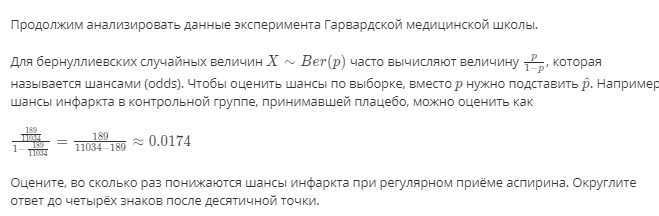

In [27]:
asp_ber = 104/(11037-104)
placebo_ber = 189/(11034-189)
round(asp_ber/placebo_ber, 4)
round(placebo_ber/asp_ber, 4)


1.8321

Восьмое задание

Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

-составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;

-установите random seed=0;

-сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.